In [1]:
!pip install pytest-playwright
!playwright install
!pip install nest_asyncio
!playwright install-deps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 39.2 MB/s eta 0:00:00
153.1 Mb [] 0% 0.0s153.1 Mb [] 0% 39.6s153.1 Mb [] 0% 42.8s153.1 Mb [] 0% 37.5s153.1 Mb [] 0% 28.0s153.1 Mb [] 0% 22.0s153.1 Mb [] 0% 15.6s153.1 Mb [] 0% 14.1s153.1 Mb [] 1% 11.5s153.1 Mb [] 1% 10.3s153.1 Mb [] 2% 8.5s153.1 Mb [] 2% 7.5s153.1 Mb [] 3% 6.9s153.1 Mb [] 3% 6.5s153.1 Mb [] 4% 6.4s153.1 Mb [] 4% 6.5s153.1 Mb [] 4% 6.4s153.1 Mb [] 4% 6.3s153.1 Mb [] 5% 6.2s153.1 Mb [] 5% 6.0s153.1 Mb [] 5% 5.9s153.1 Mb [] 6% 6.0s153.1 Mb [] 6% 6.1s153.1 Mb [] 6% 6.2s153.1 Mb [] 7% 6.1s153.1 Mb [] 7% 6.0s153.1 Mb [] 7% 5.8s153.1 Mb [] 8% 5.6s153.1 Mb [] 8% 5.5s153.1 Mb [] 9% 5.4s153.1 Mb [] 9% 5.3s153.1 Mb [] 10% 5.2s153.1 Mb [] 10% 5.0s153.1 Mb [] 11% 4.8s153.1 Mb [] 12% 4.6s153.1 Mb [] 12% 4.5s153.1 Mb [] 13% 4.6s153.1 Mb [] 14% 4.3s153.1 Mb [] 14% 4.2s153.1 Mb [] 15% 4.1s153.1 Mb [] 16% 4.0s153.1 Mb [] 16% 4.2s153.1 Mb [] 17% 4.0s153.1 Mb [] 18% 3.9s153.1 Mb [] 19% 3.9s153.1 Mb [] 20% 3.9s153.1 Mb [] 20% 4.0s1

In [2]:
import nest_asyncio
import os
import pandas as pd
import asyncio
from playwright.async_api import async_playwright

nest_asyncio.apply()

async def main(url):

    rows_list = []

    async with async_playwright() as p:
        browser = await p.firefox.launch(
            headless=True
        )
        page = await browser.new_page()
        await page.goto(url)
        await asyncio.sleep(10)
        await page.screenshot(path="momondo.png", full_page=True)

        for row in await page.locator('.nrc6').all():
            price = await row.locator('.f8F1-price-text').text_content()
            time = await row.locator('.vmXl.vmXl-mod-variant-large').text_content()
            airlines = await row.locator(".VY2U").locator('.c_cgF.c_cgF-mod-variant-default').text_content()
            stops = await row.locator('.JWEO-stops-text').text_content()
            duration = await row.locator('.xdW8').text_content()

            rows_list.append({
                'Price': price,
                'Time': time,
                'Airlines': airlines,
                'Stops': stops,
                'Duration': duration
            })

        await browser.close()

    flight_data = pd.DataFrame(rows_list)

    return flight_data

In [3]:
flight_data_cheapest = asyncio.run(main("https://www.momondo.com/flight-search/HEL-NYC/2023-10-10?sort=price_a"))

In [4]:
flight_data_best = asyncio.run(main("https://www.momondo.com/flight-search/HEL-NYC/2023-10-10?sort=bestflight_a"))

In [5]:
flight_data_quickest = asyncio.run(main("https://www.momondo.com/flight-search/HEL-NYC/2023-10-10?sort=duration_a"))

In [6]:
flight_data_earliest = asyncio.run(main("https://www.momondo.com/flight-search/HEL-NYC/2023-10-10?sort=arrive_a"))

In [7]:
flight_data_latest = asyncio.run(main("https://www.momondo.com/flight-search/HEL-NYC/2023-10-10?sort=depart_b"))

In [8]:
final_flight_data = pd.concat([flight_data_cheapest, flight_data_best, flight_data_quickest, flight_data_earliest, flight_data_latest], ignore_index=True)

In [9]:
final_flight_data

,Price,Time,Airlines,Stops,Duration
0,$434,8:35 pm – 1:15 pm+1,Scandinavian Airlines,2 stops,23h 40mHEL-EWR
1,$464,3:05 pm – 7:15 pm,Icelandair,1 stop,11h 10mHEL-EWR
2,$467,1:40 pm – 10:00 pm,"Norwegian, Norse Atlantic Airways",1 stop,15h 20mHEL-JFK
3,$468,7:10 am – 12:55 pm,Scandinavian Airlines,1 stop,12h 45mHEL-EWR
4,$484,10:00 am – 7:22 pm,Scandinavian Airlines,2 stops,16h 22mHEL-EWR
...,...,...,...,...,...
72,"$2,490",4:00 pm – 9:50 pm,Finnair,1 stop,12h 50mHEL-JFK
73,"$2,490",4:00 pm – 10:53 pm,Finnair,1 stop,13h 53mHEL-JFK
74,"$2,498",4:00 pm – 9:50 pm,American Airlines,1 stop,12h 50mHEL-JFK
75,"$2,498",4:00 pm – 10:00 pm,British Airways,1 stop,13h 00mHEL-EWR


In [10]:
final_flight_data.to_csv('final_flight_data.csv', index=False)

In [12]:
flights = pd.read_excel("flights.xlsx")

In [14]:
flights

,Price,TakeoffTime,LandingTime,Airlines,Stops,DurationHour
0,583,15:05:00,19:15:00,Icelandair,1 stop,11
1,464,15:05:00,19:15:00,Icelandair,1 stop,11
2,467,13:40:00,22:00:00,Norwegian,1 stop,15
3,468,07:10:00,12:55:00,Scandinavian Airlines,1 stop,12
4,474,10:00:00,22:00:00,Scandinavian Airlines,1 stop,19
5,484,10:00:00,19:22:00,Scandinavian Airlines,2 stops,16
6,495,10:00:00,14:55:00,Scandinavian Airlines,1 stop,11
7,495,16:55:00,22:00:00,Scandinavian Airlines,1 stop,12
8,499,09:20:00,12:55:00,Scandinavian Airlines,1 stop,10
9,534,15:45:00,22:00:00,Norwegian,2 stops,13


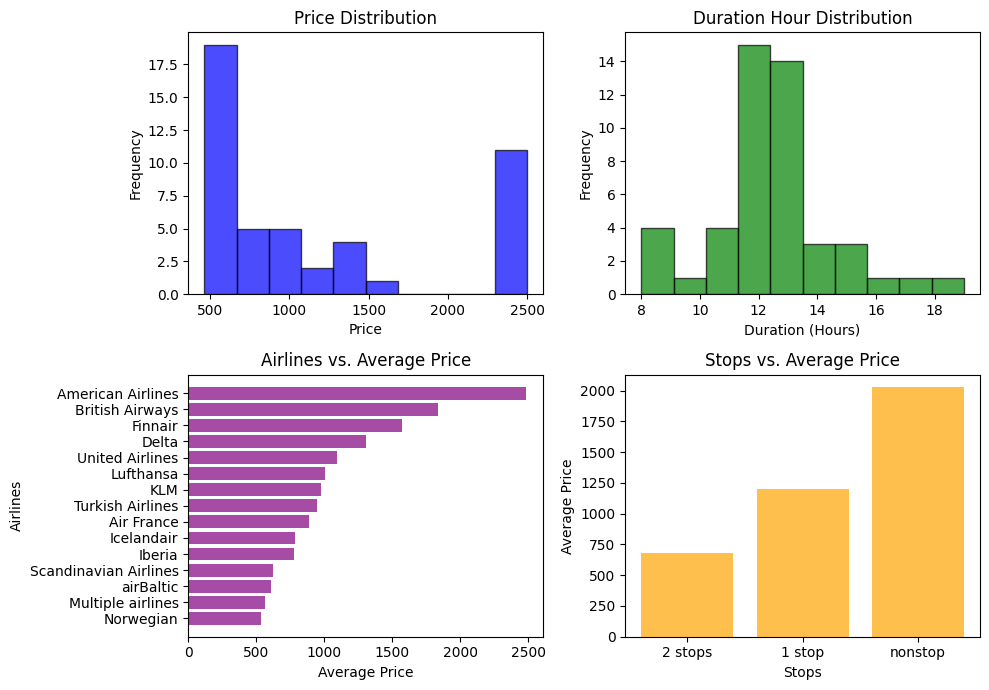

In [16]:
import matplotlib.pyplot as plt

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Plot 1: Price Distribution
axes[0, 0].hist(flights['Price'], bins=10, color='blue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Duration Hour Distribution
axes[0, 1].hist(flights['DurationHour'], bins=10, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Duration Hour Distribution')
axes[0, 1].set_xlabel('Duration (Hours)')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Airlines vs. Average Price
avg_price_per_airline = flights.groupby('Airlines')['Price'].mean().sort_values()
axes[1, 0].barh(avg_price_per_airline.index, avg_price_per_airline.values, color='purple', alpha=0.7)
axes[1, 0].set_title('Airlines vs. Average Price')
axes[1, 0].set_xlabel('Average Price')
axes[1, 0].set_ylabel('Airlines')

# Plot 4: Stops vs. Average Price
avg_price_per_stop = flights.groupby('Stops')['Price'].mean().sort_values()
axes[1, 1].bar(avg_price_per_stop.index, avg_price_per_stop.values, color='orange', alpha=0.7)
axes[1, 1].set_title('Stops vs. Average Price')
axes[1, 1].set_xlabel('Stops')
axes[1, 1].set_ylabel('Average Price')

# Show the plots
plt.tight_layout()
plt.show()
